<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import pandas as pd
import numpy as np

import squarify
import matplotlib.pyplot as plt

import spacy
from spacy.tokenizer import Tokenizer

from bs4 import BeautifulSoup

In [2]:
df = pd.read_csv("data/job_listings.csv")
df

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist
...,...,...,...
421,421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer
422,422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...
423,423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance
424,424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist


In [3]:
df["description"][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [4]:
df["description"][15]

'b\'<div><p>The Atlantic is seeking a Data Scientist to help lead research and analysis initiatives and support ongoing delivery of key insights to drive business growth and overall impact. The role will work closely with partners in Consumer Revenue, Advertising, Editorial, and Product to understand performance, identify and predict opportunities for improvement, and develop plans of action to maximize revenue, audience growth, and editorial engagement.</p>\\n<p>This is a great opportunity to be part of a growing team and help shape the way we develop, deploy, and operate production quality analytics systems and processes\\xe2\\x80\\x94and have an impact on how The Atlantic uses data in the years to come.</p>\\n<p><b>Responsibilities:</b></p>\\n<ul><li>Lead research projects from hypothesis formation to delivering findings and recommendations to stakeholders</li>\\n<li>Use supervised and unsupervised machine learning techniques to make predictions and categorize</li>\\n<li>Design, exe

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [5]:
from bs4 import BeautifulSoup
import requests

def text_cleaner(text):
    """
    Cleans html tags, newlines, and some other characters
    """
    
    # Remove html tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    #lowercase string
    text = text.lower()
    
    # Removes new lines
    text = text.replace("\\n", " ")
    
    # Removes backslash
    text = text.replace("/", " ")
    
    # Remove first 2 characters in description b and quotation marks
    text = text[2:]
    
    # Could not include this in the loop because it would remove the necessary space between two words
    text = text.replace("\\xe2\\x80\\x94", " ")
    
    
#     # googled how to replace unicode 
#     # https://stackoverflow.com/questions/46154561/remove-zero-width-space-unicode-character-from-python-string
#     text = text.encode('ascii', 'ignore').decode('unicode_escape')
# did not work as well as I thought

    # Removing some strange characters manually
    remove = ["\\xe2\\x80\\xa6", "\\xc2\\xa8", "\\xe2\\x80\\x93", "\\xe2\\x80\\x99"]
    
    for r in remove: 
        text = text.replace(r, "")
    
    return text
    

In [6]:
df["description"] = df["description"].apply(text_cleaner)
    
df.head()

,Unnamed: 0,description,title
0,0,job requirements: conceptual understanding in ...,Data scientist
1,1,"job description as a data scientist 1, you wi...",Data Scientist I
2,2,as a data scientist you will be working on con...,Data Scientist - Entry Level
3,3,"$4,969 - $6,756 a monthcontractunder the gener...",Data Scientist
4,4,location: usa multiple locations 2+ years of ...,Data Scientist


In [7]:
df["description"][0]

'job requirements: conceptual understanding in machine learning models like naive bayes, k-means, svm, apriori, linear  logistic regression, neural, random forests, decision trees, k-nn along with hands-on experience in at least 2 of them intermediate to expert level coding skills in python r. (ability to write functions, clean and efficient data manipulation are mandatory for this role) exposure to packages like numpy, scipy, pandas, matplotlib etc in python or ggplot2, dplyr, tidyr in r ability to communicate model findings to both technical and non-technical stake holders hands on experience in sql hive or similar programming language must show past work via github, kaggle or any other published article master\'s degree in statistics mathematics computer science or any other quant specific field. apply now"'

In [8]:
df["description"][15]

'the atlantic is seeking a data scientist to help lead research and analysis initiatives and support ongoing delivery of key insights to drive business growth and overall impact. the role will work closely with partners in consumer revenue, advertising, editorial, and product to understand performance, identify and predict opportunities for improvement, and develop plans of action to maximize revenue, audience growth, and editorial engagement. this is a great opportunity to be part of a growing team and help shape the way we develop, deploy, and operate production quality analytics systems and processes and have an impact on how the atlantic uses data in the years to come. responsibilities: lead research projects from hypothesis formation to delivering findings and recommendations to stakeholders use supervised and unsupervised machine learning techniques to make predictions and categorize design, execute, and evaluate tests across the company guide the development of reports, dashboar

## 2) Use Spacy to tokenize the listings 

In [9]:
def document_tokenizer(docs, stop_words = []):
    """
    Utilize tokenizing process into one function
    
    Returns tockenized document
    """
    nlp = spacy.load("en_core_web_lg")
    tokenizer = Tokenizer(nlp.vocab)
    
    STOP_WORDS = nlp.Defaults.stop_words.union(stop_words)
    
    tokens = []
    
    """ Update those tokens w/o stopwords"""
    for doc in tokenizer.pipe(docs):
        
        lemmas = []
        
        for token in doc:
            if (token.text.lower() not in STOP_WORDS) and (token.is_punct == False) and (token.is_space == False) and (token.pos_ != 'PRON'):
                lemmas.append(token.lemma_.lower())
        
        tokens.append(lemmas)
    
    return tokens

In [10]:
from tqdm import tqdm
tqdm.pandas()

/Applications/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
df["tokens"] = df["description"].progress_apply(document_tokenizer)
df.head()

Above took way too long, tokenized in steps instead

In [11]:
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [12]:
# Stop words
STOP_WORDS = nlp.Defaults.stop_words.union(['job', 'apply', 'new', 'company', 'opportunity', 'internship', 'work', 'working', 'ability',
                                            'understand', 'successful', 'display', 'must'])

In [15]:
# pipeline - lemmatize and remove any stopwords or spaces
tokens = []

for doc in tokenizer.pipe(df["description"]):
        
        lemmas = []
        
        for token in doc:
            if (token.text.lower() not in STOP_WORDS) and (token.is_punct == False) and (token.is_space == False) and (token.pos_ != 'PRON'):
                lemmas.append(token.lemma_.lower())
        
        tokens.append(lemmas)

In [16]:
df['tokens'] = tokens
df['tokens'].head()

0    [requirements:, conceptual, understand, machin...
1    [description, datum, scientist, 1,, help, buil...
2    [datum, scientist, consult, business., respons...
3    [$4,969, $6,756, monthcontractunder, general, ...
4    [location:, usa, multiple, location, 2+, year,...
Name: tokens, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [17]:
#Initialize CountVectorizer()
vect = CountVectorizer()

# Create a vocabulary and get word counts per document
dtm = vect.fit_transform(df["description"])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
print(dtm.shape)
dtm.head()

(426, 8820)


,00,000,02115,03,0305,0356,04,062,06366,08,...,zf,zfs,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich,zurichs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [18]:
# count function
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ["word", "count"])

        wc["rank"] = wc["count"].rank(method="first", ascending=False)
        total = wc["count"].sum()

        wc["pct_total"] = wc["count"].apply(lambda x: x / total)
        
        wc = wc.sort_values(by="rank")
        wc["cul_pct_total"] = wc["pct_total"].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=["word", "appears_in"])
        wc = ac.merge(wc, on="word")

        wc["appears_in_pct"] = wc["appears_in"].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by="rank")

In [19]:
wc = count(df["tokens"])

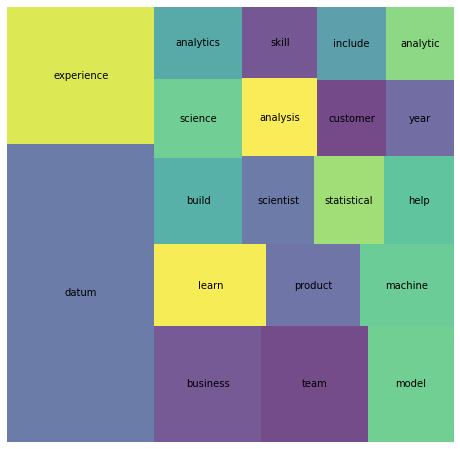

In [20]:
# graph 
wc_top20 = wc[wc["rank"] <= 20]

plt.figure(figsize = (8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.75)
plt.axis("off")
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [21]:
tfidf = TfidfVectorizer(stop_words = "english",
                       ngram_range = (1,2),
                       min_df = 3,
                       max_df = 0.6,
                       max_features = 5000)

dtm2 = tfidf.fit_transform(df["description"])

dtm2 = pd.DataFrame(dtm2.todense(), columns = tfidf.get_feature_names())

print(dtm2.shape)
dtm2.head()

(426, 5000)


,000,000 employees,10,10 years,100,100 000,11,12,12 months,15,...,york,york city,youll,youll develop,youll doing,youll need,youll work,youre,youve,yrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [22]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors = 5, algorithm = 'kd_tree')
nn.fit(dtm2)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [23]:
ideal_job = "My ideal job would be one where I have lots of opportunity for learning and growth, flexible hours, and a work from home option"

In [24]:
new = tfidf.transform([ideal_job])

nn.kneighbors(new.todense())

(array([[1.31578927, 1.31578927, 1.32164445, 1.34105324, 1.34190584]]),
 array([[107, 259,  82, 200,  17]]))

In [26]:
df["description"][107]

"hrs is looking to add a data scientist to our rapidly growing engineering team. among other things, this individual will be responsible for using data to find answers to questions of healthcare professionals for managing patient care, including areas of risk analysis, statistical anonymization, predictive analytics, and much more. this role will involve working primarily in python and the jupiter labs framework, but since we are a small team each member must be able to learn quickly and be self-sufficient, flexible and motivated to work with many different technologies and applications as needed. this is an exciting opportunity to have a huge impact in the early stages of our data department development, while making a meaningful difference in the lives of clinicians and patients.  minimum qualifications expert with python background in bioinformatics experience with keras, scikitlearn, and tensorflow experience working with jupiter labs or jupiter notebooks ongoing interest in keepin

In [27]:
df["description"][259]

"hrs is looking to add a data scientist to our rapidly growing engineering team. among other things, this individual will be responsible for using data to find answers to questions of healthcare professionals for managing patient care, including areas of risk analysis, statistical anonymization, predictive analytics, and much more. this role will involve working primarily in python and the jupiter labs framework, but since we are a small team each member must be able to learn quickly and be self-sufficient, flexible and motivated to work with many different technologies and applications as needed. this is an exciting opportunity to have a huge impact in the early stages of our data department development, while making a meaningful difference in the lives of clinicians and patients.  minimum qualifications expert with python background in bioinformatics experience with keras, scikitlearn, and tensorflow experience working with jupiter labs or jupiter notebooks ongoing interest in keepin

In [28]:
df["description"][82]

'founded in 2015, honor is now one of the fastest-growing, non-medical home care companies in the u.s. why? because we realized that by combining our amazing technology and operations with the local, personal touch of our partner agencies, we could make real progress in transforming this fast-growing, $30bn industry. this unique approach is powering our huge growth - we have cutting-edge machine learning, a beautiful, well-designed app, and industry-leading design, paired with a strong sales, marketing, and support engine.  our mission and ambitions are huge. we\'re looking for people who believe, as we do, that modernizing home care for our parents and yours is one of the most important problems we can solve. honor is a well-funded, strongly backed company with experienced leaders who have a proven track record of building large businesses and solving extraordinarily difficult challenges. join us!  we\'re looking for a data scientist to join our team. you\'ll develop predictive models

In [29]:
df["description"][200]

"about the team zillow is looking for an extraordinary data scientist to join a growing team. zillow is on a mission to give consumers certainty and control when selling their home. in particular, using our unparalleled data, and view into housing markets, to help build a world-class platform for real estate marketplace optimization. in the zillow offers product, zillow buys homes directly from interested homeowners, thereby sparing them the tremendous stress and effort of selling. instead, we take that upon ourselves by quickly preparing these homes for the market and sell them to buyers. this is a key initiative at zillow as we aim to define the future of real estate. this product isnt viable for everyone (yet). when thats the case, we want to make sure we still help consumers sell their home. our team is tasked with absorbing dozens, sometimes billions, of rows of data from various sources, organizing them, analyzing them, and visualizing them to help inform both short- and long-ter

In [30]:
df["description"][17]

"contractwe are looking to hire for a data scientist (remote).  qualifications: this job is for a data scientist who is an expert in python. developer should also have basic experience with postgres database. goal is to develop a general purpose script that creates various models for user imported datasets and choose the best model for making predictions. must be american citizen authorized to work in us.  overview of work : developer will be working on an already built product that requires new features and bug fixing . self testing and bug fixing is an important part of the job. product is a tool that automates machine learning and makes natural language search and predictions on user imported data. developer will be working on a flexible schedule. he will be part of a remotely working team collaborating through skype and needs to take part in daily calls.  job type: contract to hire'"

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 